# Comparing Results

## Comparing PINN and Baseline MLP with different data length


In [1]:
import importlib
import config
import pandas as pd
from pathlib import Path
from config import *

In [2]:
#Default baseline mlp 2017
years = 2017
NN_TYPE = 'MLP'
LOSS_FUNC = 'MSE'
RESULTS_METRICS_FILENAME = f'results_{NN_TYPE}_no2_{LOSS_FUNC}_{years}.csv'

In [3]:
def get_PINN_improvement(years):
    
    mlp_file = RESULTS_PATH / 'metrics' / f'results_MLP_no2_MSE_{years}.csv'
    pinn_file = RESULTS_PATH / 'metrics' / f'results_MLP_no2_PINN_{years}.csv'

    # Load CSVs (they are comma-separated)
    mlp_df = pd.read_csv(mlp_file)
    pinn_df = pd.read_csv(pinn_file)

    # First row is the metrics
    mlp_metrics = mlp_df.iloc[0]
    pinn_metrics = pinn_df.iloc[0]


    # Choose metrics to compare
    metrics_to_compare = ["MSE", "RMSE", "SMAPE", 'Inference Time', 'Training Time']

    # Calculate % improvement
    improvement = ((mlp_metrics[metrics_to_compare] - pinn_metrics[metrics_to_compare]) / mlp_metrics[metrics_to_compare]) * 100

    # Output nicely
    print(f"Percentage Improvement of PINN over MLP of the year {years}:")
    for metric in metrics_to_compare:
        print(f"{metric}: {improvement[metric]:.2f}%")
    
    return improvement


## 2017 PINN vs MLP

In [4]:
years = 2017
# Get the improvement of PINN over MLP for the specified year
improvement_2017 = get_PINN_improvement(years)



Percentage Improvement of PINN over MLP of the year 2017:
MSE: 24.44%
RMSE: 7.95%
SMAPE: 4.12%
Inference Time: 7.99%
Training Time: -25.35%


## 2017 2018 2020 PINN vs MLP

In [5]:
years = 'first_3_years'
improvement_first_3_years = get_PINN_improvement(years)

Percentage Improvement of PINN over MLP of the year first_3_years:
MSE: 20.47%
RMSE: 4.74%
SMAPE: 4.43%
Inference Time: -0.98%
Training Time: -16.75%


## All years PINN vs MLP

In [6]:
years = 'allyears'
improvement_all_years = get_PINN_improvement(years)

Percentage Improvement of PINN over MLP of the year allyears:
MSE: 9.80%
RMSE: 3.43%
SMAPE: 6.54%
Inference Time: 56.73%
Training Time: -86.22%


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Collect improvements across different training data durations
data = {
    "2017": improvement_2017,
    "first_3_years": improvement_first_3_years,
    "all_years": improvement_all_years
}

# Convert to DataFrame
improvement_df = pd.DataFrame(data).T  # Transpose so rows are years, columns are metrics


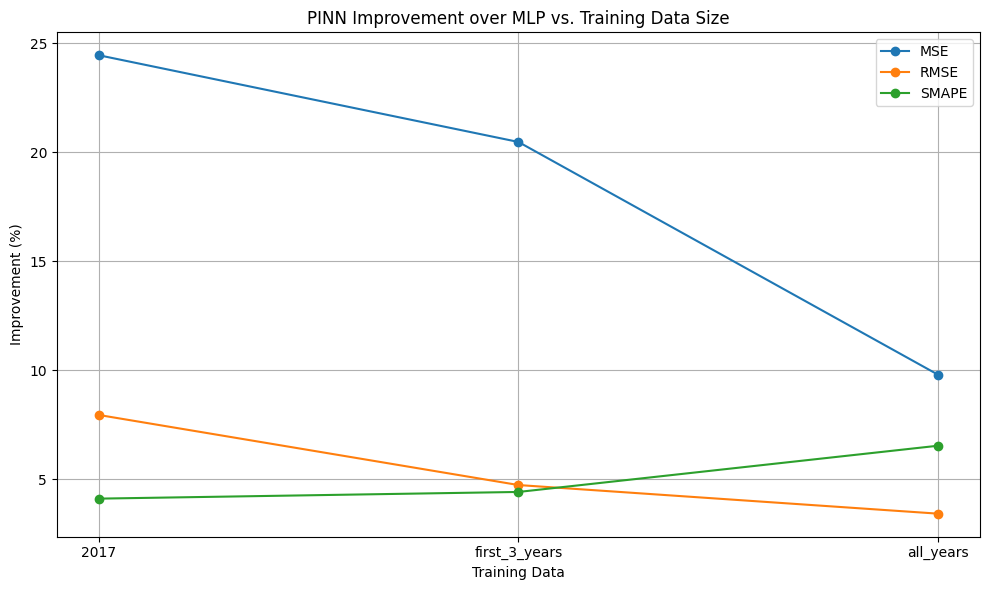

In [8]:
plt.figure(figsize=(10, 6))
for metric in ["MSE", "RMSE", "SMAPE"]:
    plt.plot(improvement_df.index, improvement_df[metric], marker="o", label=metric)

plt.title("PINN Improvement over MLP vs. Training Data Size")
plt.ylabel("Improvement (%)")
plt.xlabel("Training Data")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import linregress

# Example: quantify trend for MSE
x = [1, 2, 3]  # Encode: 2017 = 1, first_3_years = 2, all_years = 3
y = improvement_df["MSE"].values
slope, intercept, r_value, _, _ = linregress(x, y)

print(f"Trend for MSE improvement: slope = {slope:.2f}, R² = {r_value**2:.2f}")


Trend for MSE improvement: slope = -2.26, R² = 0.94
